In [3]:
import json

ATTACK = '1'
BENIGN = '0'
OTHER  = '-1' 

with open("../../data/pre_process/dissection_clean/5GCTD.json") as f:
    my_json = json.load(f)

total_dict = {
    BENIGN : [],
    ATTACK : [],
    OTHER  : []
}

for dissected_pkt in my_json:

    is_attack = dissected_pkt["common"]["is_attack"]

    if bool(int(is_attack)) and dissected_pkt["common"]["ip_src"] == "10.100.200.1":
        print(dissected_pkt)
    
    total_dict[is_attack].append(dissected_pkt["common"]["ip_src"])

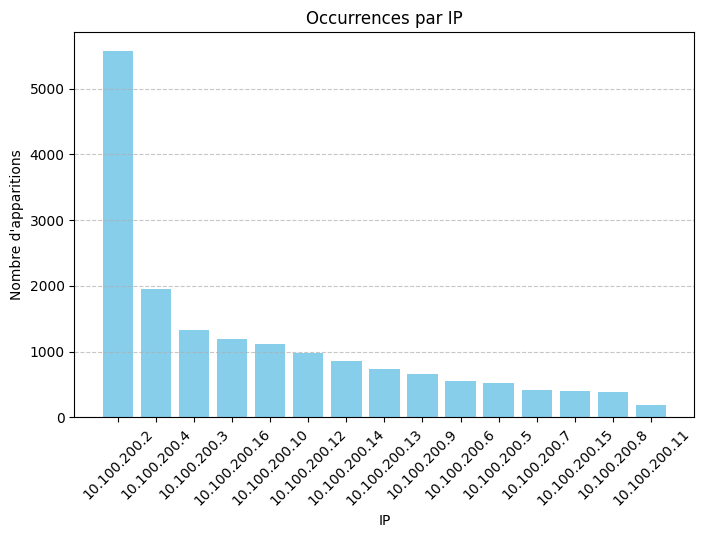

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

all_ips = total_dict[ATTACK]
df = pd.Series(all_ips).value_counts().reset_index()
df.columns = ['IP', 'Count']

# 2️⃣ Tracer un histogramme
plt.figure(figsize=(8,5))
plt.bar(df['IP'], df['Count'], color='skyblue')
plt.xlabel('IP')
plt.ylabel('Nombre d\'apparitions')
plt.title('Occurrences par IP')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()